In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
# Prepare capture 2 and sample 1 
dataset_capture2 = pd.read_csv('./A capture 2 test with renaming and classification done tcp only.csv' ,sep= ',')
dataset_capture2.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Class
0,8,0.061761,Google,Google,TLSv1.2,107,Application Data,browsing
1,9,0.061761,Google,Google,TCP,107,TCP Retransmission,browsing
2,10,0.061761,Google,Google,TCP,107,TCP Retransmission,browsing
3,11,0.061761,Google,Google,TCP,107,TCP Retransmission,browsing
4,12,0.061761,Google,Google,TCP,107,TCP Retransmission,browsing


In [4]:
# Prepare capture 2 and sample 1 
dataset_sample1 = pd.read_csv('./A sample 1 with renaming and classification done tcp only.csv' ,sep= ',')
dataset_sample1.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Class
0,1,0.000000,Local,CDN,TCP,54,ACK,browsing
1,2,0.000231,CDN,Local,TCP,60,TCP ACKed unseen segment,browsing
2,3,0.255982,Local,CDN,TCP,54,ACK,browsing
3,4,0.256340,CDN,Local,TCP,60,TCP ACKed unseen segment,browsing
4,5,1.280050,Local,117.18.237.29,TCP,54,ACK,Unknown


In [7]:
df_capture2 =  dataset_capture2[['Source','Destination','Protocol','Length','Info','Class']]
df_capture2.columns

Index(['Source', 'Destination', 'Protocol', 'Length', 'Info', 'Class'], dtype='object')

In [8]:
df_sample1 =  dataset_sample1[['Source','Destination','Protocol','Length','Info','Class']]
df_sample1.columns

Index(['Source', 'Destination', 'Protocol', 'Length', 'Info', 'Class'], dtype='object')

In [9]:
# using label encoder to categories => training data set 
label_encoder = LabelEncoder()

for i in range(0,6):  # minus numerical values
    df_capture2.iloc[:,i] = label_encoder.fit_transform(df_capture2.iloc[:,i])

C:\Users\tanfe\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
df_capture2.head()

,Source,Destination,Protocol,Length,Info,Class
0,7,8,1,42,1,1
1,7,8,0,42,30,1
2,7,8,0,42,30,1
3,7,8,0,42,30,1
4,7,8,0,42,30,1


In [11]:
# testing data set 
for i in range(0,6):  # minus numerical values
    df_sample1.iloc[:,i] = label_encoder.fit_transform(df_sample1.iloc[:,i])

C:\Users\tanfe\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
df_sample1.head()

,Source,Destination,Protocol,Length,Info,Class
0,8,7,0,0,0,1
1,6,9,0,1,2,1
2,8,7,0,0,0,1
3,6,9,0,1,2,1
4,8,0,0,0,0,0


In [13]:
# training and test data split
X_train = df_capture2.iloc[:,0:4]
y_train = df_capture2['Class']
X_test = df_sample1.iloc[:,0:4]
y_test = df_sample1['Class']

>1, train: 0.993, test: 0.994
>2, train: 0.999, test: 0.998
>3, train: 0.999, test: 0.998
>4, train: 1.000, test: 0.998
>5, train: 1.000, test: 0.999
>6, train: 1.000, test: 0.999
>7, train: 1.000, test: 0.999
>8, train: 1.000, test: 0.999
>9, train: 1.000, test: 0.999
>10, train: 1.000, test: 0.999
>11, train: 1.000, test: 0.999
>12, train: 1.000, test: 0.999
>13, train: 1.000, test: 0.999
>14, train: 1.000, test: 0.999
>15, train: 1.000, test: 0.999
>16, train: 1.000, test: 0.999
>17, train: 1.000, test: 0.999
>18, train: 1.000, test: 0.999
>19, train: 1.000, test: 0.999
>20, train: 1.000, test: 0.999


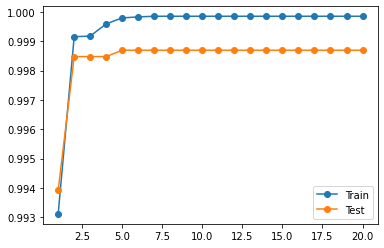

In [14]:
# find maximum depth for decision tree
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = DecisionTreeClassifier(max_depth=i)
 #model = DecisionTreeClassifier(criterion = "gini", random_state = 100, 
                         #      max_depth=8, min_samples_leaf=4)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [15]:
# max depth = 5 result from train vs test accuracy score ]
# train the training test set 
dt = DecisionTreeClassifier(random_state=42,max_depth=5)
t0 = time.time()
result = dt.fit(X_train,y_train)
t1 = time.time()
total = t1-t0
total

0.04848837852478027

In [16]:
# predict the test set 
t0 = time.time()
y_pred = dt.predict(X_test)
t1 = time.time()
total = t1-t0
total

0.003912925720214844

In [17]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [18]:
from collections import Counter
# Assuming y_pred is your prediction array or list
counter = Counter(y_pred)

# Print the count of each unique value in y_pred
print(counter)

Counter({1: 4551, 0: 50})


In [19]:
print(accuracy_score(y_test,y_pred))

0.9986959356661596


In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

0.036111830940018394

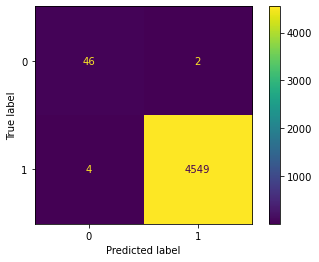

In [21]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [22]:
from sklearn import tree
import graphviz
from graphviz import Source

[Text(104.625, 199.32, 'X[1] <= 1.5\ngini = 0.039\nsamples = 88740\nvalue = [1749, 86991]'),
 Text(30.436363636363637, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.005\nsamples = 1144\nvalue = [1141, 3]'),
 Text(15.218181818181819, 126.83999999999999, 'gini = 0.0\nsamples = 1136\nvalue = [1136, 0]'),
 Text(45.654545454545456, 126.83999999999999, 'X[3] <= 44.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(30.436363636363637, 90.6, 'X[3] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(15.218181818181819, 54.359999999999985, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(45.654545454545456, 54.359999999999985, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(60.872727272727275, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(178.81363636363636, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.014\nsamples = 87596\nvalue = [608, 86988]'),
 Text(106.52727272727273, 126.83999999999999, 'X[0] <= 1.5\ngini = 0.004\nsamples = 538\nvalue = [537, 1]'),
 Text(91.30909090909091

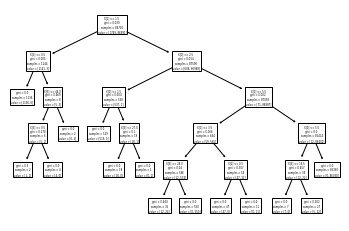

In [23]:
tree.plot_tree(result)

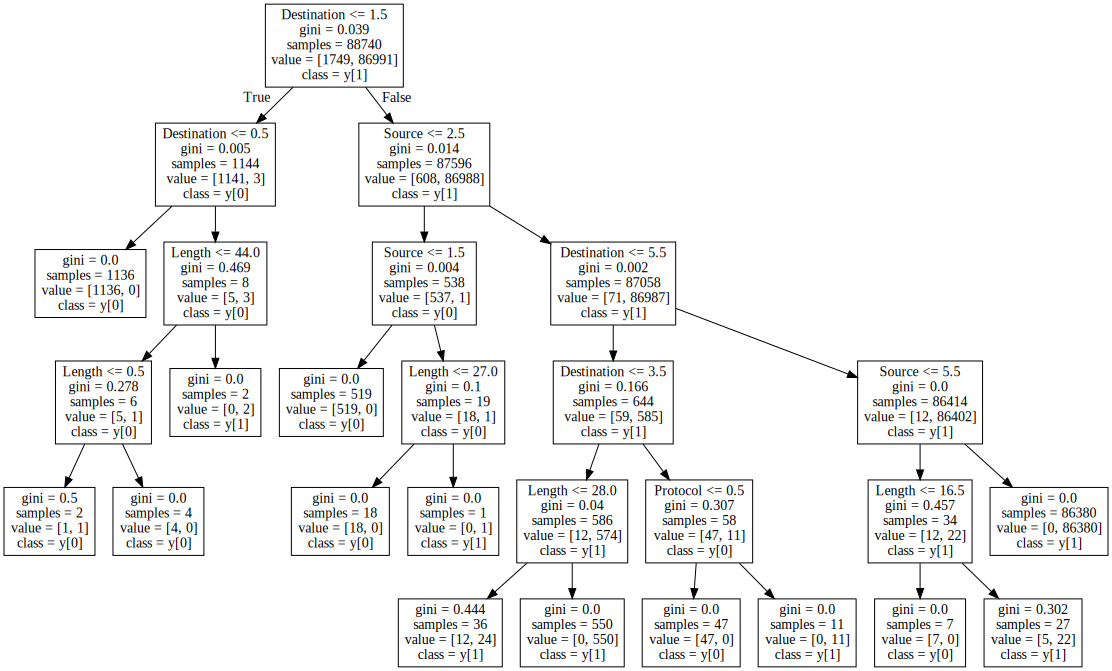

In [24]:
Source(tree.export_graphviz(dt,out_file=None,class_names=True,feature_names=X_train.columns))